In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

uploaded = files.upload()

Saving iris_dataset.csv to iris_dataset (1).csv


In [9]:
df= pd.read_csv('iris_dataset.csv')
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


#Part 1

In [10]:
Targetrange = range(df['target'].nunique())
classes = list(Targetrange)
features = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

In [33]:
for cls in classes:
    subset = df[df['target'] == cls][features]

    mean_vals = subset.mean()
    std_vals = subset.std()
    range_vals = subset.max() - subset.min()

    stats_df = pd.DataFrame({
        'Mean': mean_vals,
        'Std': std_vals,
        'Range': range_vals
    })


    print(f"جدول آمار برای کلاس ‎{cls}‎ (تعداد نمونه‌ها: ‎{len(subset)}‎):")
    print(stats_df.round(4))
    print("\n" + "="*50 + "\n")

جدول آمار برای کلاس ‎0‎ (تعداد نمونه‌ها: ‎50‎):
                    Mean     Std  Range
sepal length (cm)  5.006  0.3525    1.5
sepal width (cm)   3.428  0.3791    2.1
petal length (cm)  1.462  0.1737    0.9
petal width (cm)   0.246  0.1054    0.5


جدول آمار برای کلاس ‎1‎ (تعداد نمونه‌ها: ‎50‎):
                    Mean     Std  Range
sepal length (cm)  5.936  0.5162    2.1
sepal width (cm)   2.770  0.3138    1.4
petal length (cm)  4.260  0.4699    2.1
petal width (cm)   1.326  0.1978    0.8


جدول آمار برای کلاس ‎2‎ (تعداد نمونه‌ها: ‎50‎):
                    Mean     Std  Range
sepal length (cm)  6.588  0.6359    3.0
sepal width (cm)   2.974  0.3225    1.6
petal length (cm)  5.552  0.5519    2.4
petal width (cm)   2.026  0.2747    1.1




# Part 2 & 3: Corralation and Heatmap

Corralation for class 0:
                   sepal length (cm)  sepal width (cm)  petal length (cm)  \
sepal length (cm)             1.0000            0.7425             0.2672   
sepal width (cm)              0.7425            1.0000             0.1777   
petal length (cm)             0.2672            0.1777             1.0000   
petal width (cm)              0.2781            0.2328             0.3316   

                   petal width (cm)  
sepal length (cm)            0.2781  
sepal width (cm)             0.2328  
petal length (cm)            0.3316  
petal width (cm)             1.0000  


Corralation for class 1:
                   sepal length (cm)  sepal width (cm)  petal length (cm)  \
sepal length (cm)             1.0000            0.5259             0.7540   
sepal width (cm)              0.5259            1.0000             0.5605   
petal length (cm)             0.7540            0.5605             1.0000   
petal width (cm)              0.5465            0.6640          

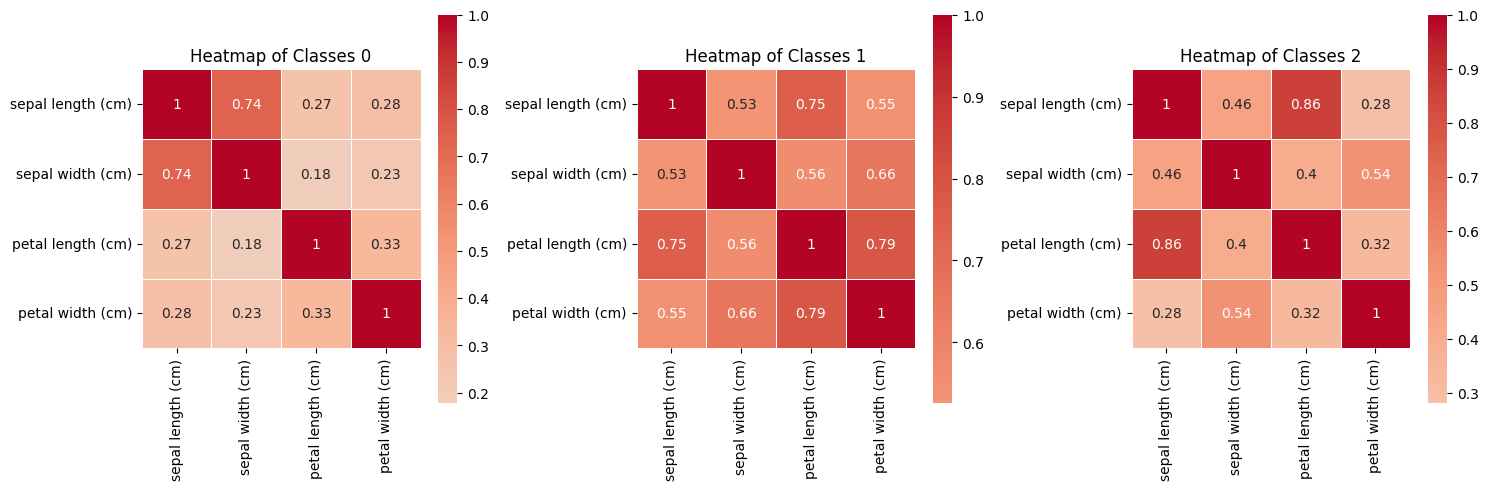

In [35]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for idx, cls in enumerate(classes):
    subset = df[df['target'] == cls][features]
    corr_matrix = subset.corr()


    print(f"Corralation for class {cls}:")
    print(corr_matrix.round(4))
    print("\n")


    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, ax=axes[idx],
                square=True, linewidths=0.5)
    axes[idx].set_title(f'Heatmap of Classes {cls}')

plt.tight_layout()
plt.show()

#نمایش بزرگترین میزان در هر ماتریس به صورت خودکار

In [38]:
for cls in classes:
    subset = df[df['target'] == cls][features]
    corr_matrix = subset.corr()

    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
    corr_unstack = corr_matrix.mask(mask).stack().abs()

    max_corr_pair = corr_unstack.idxmax()
    max_corr_value = corr_matrix.loc[max_corr_pair[0], max_corr_pair[1]]

    print(f"در کلاس ‎{cls}‎: جفت '‎{max_corr_pair[0]}‎' و '‎{max_corr_pair[1]}‎' با همبستگی ‎{max_corr_value:.4f}‎ (بالاترین مقدار)")

در کلاس ‎0‎: جفت '‎sepal width (cm)‎' و '‎sepal length (cm)‎' با همبستگی ‎0.7425‎ (بالاترین مقدار)
در کلاس ‎1‎: جفت '‎petal width (cm)‎' و '‎petal length (cm)‎' با همبستگی ‎0.7867‎ (بالاترین مقدار)
در کلاس ‎2‎: جفت '‎petal length (cm)‎' و '‎sepal length (cm)‎' با همبستگی ‎0.8642‎ (بالاترین مقدار)
